# What Is ARIMA?

ARIMA stands for AutoRegressive Integrated Moving Average, and it's a forecasting model used for time series data. It combines three key ideas to make predictions based on past values and patterns in the data.

## Components of ARIMA:
1. **AR (AutoRegressive):**
Uses past values of the time series to predict future values.
Think of it like, "Today's value depends on past values, like yesterday's value."

2. **I (Integrated):**
Deals with making the data stationary, which means ensuring that the data doesn't have a trend (like a continuous upward or downward movement).
It removes trends by differencing the data, so you can work with data that's more stable over time.

3. **MA (Moving Average):**
Uses past forecast errors (the differences between actual values and predicted values) to predict future values.
It's like saying, "If my previous forecast was wrong by a certain amount, I'll adjust my next prediction based on that error."

## Why Use ARIMA?
ARIMA is powerful because it combines all three components to handle a wide range of time series patterns, including trends, seasonality, and irregular fluctuations. It's especially useful for forecasting when you don't have external factors but want to predict based purely on the internal structure of the data.

## When ARIMA Helps:
Trends and Patterns: It helps when the data has trends (upward/downward movements) and seasonal patterns (like sales increasing every December).
Non-stationary Data: It helps stabilize data that changes over time by making it stationary (through differencing).
Past Influence: It takes into account both the past values (AR) and the errors from previous forecasts (MA) to give a better prediction.

## How ARIMA Helps:
It helps you forecast future values based on the patterns in your past data.
You can use it to model complex time series data, combining trends, patterns, and fluctuations.
It helps in decision-making by giving you data-driven insights for future planning, like forecasting sales, stock prices, or demand

### Why ARIMA Requires Stationary Data

#### What is Stationarity?
A **stationary time series** has the following properties:
1. **Constant Mean**: The average value of the data stays the same over time.
2. **Constant Variance**: The spread or variability in the data remains steady over time.
3. **No Trend or Seasonality**: The data shows no long-term upward/downward movement (trend) or repeating patterns (seasonality).

In simple terms, stationary data maintains a consistent pattern without any long-term changes in behavior.

---

#### Why Does ARIMA Need Stationary Data?

1. **Easier to Model**:
   - Stationary data is stable, meaning its statistical properties (mean, variance) do not change over time. This stability allows ARIMA to detect relationships between past and future values, leading to more accurate predictions.

2. **Consistent Patterns**:
   - ARIMA relies on past data to predict future values. If the data has a trend or seasonality, the patterns become inconsistent—what was true in the past might not be true in the future. Removing these trends or seasonal effects creates a consistent pattern that ARIMA can model effectively.

3. **Better Error Reduction**:
   - Non-stationary data can cause prediction errors to grow over time. By converting the data into a stationary form, ARIMA reduces the risk of compounding errors and focuses on the core, underlying structure of the data.

---

#### What Happens with a Trend?
When a time series has a trend, it’s **non-stationary**, meaning the average value changes over time. If ARIMA is applied without removing this trend:

- The model may make poor predictions because the mean is shifting.
- Predictions will often be inaccurate because ARIMA assumes the data has a stable, repeating pattern.

##### Example:
Suppose you're forecasting sales for an ice cream shop:
- If sales increase over time due to more customers, this represents a **trend**.
- If ARIMA doesn't handle this trend, it will try to predict based on values that don’t match the future pattern because the data is changing over time.

---

#### How ARIMA Handles Trends: Differencing
To make the data stationary, ARIMA uses a process called **differencing**:

- Differencing involves subtracting the previous value from the current value to remove the trend. For example:
  
  If sales go from 100 to 105, ARIMA looks at the difference of **+5** rather than the actual sales values.

- This process helps to stabilize the data, allowing ARIMA to focus on predicting future differences rather than the changing trend.

##### Why Trend Removal Helps:
- **More Stable Predictions**: When the trend is removed, ARIMA can concentrate on predicting short-term variations, which are more stable and easier to model.
- **Better Accuracy**: The model is not "confused" by long-term shifts or trends, leading to more reliable predictions.

---

### Conclusion
ARIMA requires stationary data because stationary time series are easier to model and make reliable predictions from. By removing trends and seasonality (through differencing or other techniques), ARIMA can focus on the consistent, underlying patterns in the data, leading to more accurate forecasting.


# Example

### Monthly Sales Data

We have the following sales data for a small store over 12 months:


\begin{array}{|c|c|}
\hline
\textbf{Month} & \textbf{Sales} \\
\hline
\text{Jan} & 100 \\
\text{Feb} & 110 \\
\text{Mar} & 105 \\
\text{Apr} & 120 \\
\text{May} & 115 \\
\text{Jun} & 130 \\
\text{Jul} & 125 \\
\text{Aug} & 140 \\
\text{Sep} & 135 \\
\text{Oct} & 150 \\
\text{Nov} & 145 \\
\text{Dec} & 160 \\
\hline
\end{array}



In [1]:
import pandas as pd
import matplotlib.pyplot as plt

sales_data = [100, 110, 105, 120, 115, 130, 125, 140, 135, 150, 145, 160]

months = [
    'January', 'February', 'March', 'April', 'May', 'June',
    'July', 'August', 'September', 'October', 'November', 'December'
]

sales_df = pd.DataFrame({
    'Month': months,
    'Sales': sales_data
})

sales_df


,Month,Sales
0,January,100
1,February,110
2,March,105
3,April,120
4,May,115
5,June,130
6,July,125
7,August,140
8,September,135
9,October,150


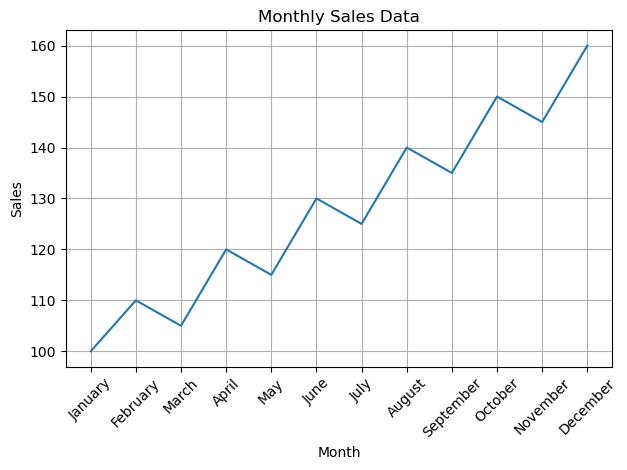

In [2]:
plt.plot(sales_df['Month'], sales_df['Sales'])
plt.xlabel('Month')
plt.ylabel('Sales')
plt.title('Monthly Sales Data')
plt.grid(True)
plt.xticks(rotation = 45)
plt.tight_layout()
plt.show()

## Objective: Forecast Future Sales Using ARIMA(1,1,1) Model

We aim to use the ARIMA(1,1,1) model to predict future sales based on the past 12 months of sales data.

### Step 1: Check for Stationarity

Before applying the ARIMA model, we need to check if the time series data is stationary. If not, we will apply differencing to achieve stationarity.

#### Sales Data:


Sales: [100, 110, 105, 120, 115, 130, 125, 140, 135, 150, 145, 160]

#### First Differences:

Sales
[
1
:
]
−
Sales
[
:
−
1
]
Differenced Sales=Sales[1:]−Sales[:−1]


#### Differenced Sales:


\begin{array}{|c|c|}
\hline
\textbf{Month} & \textbf{Differenced Sales} \\
\hline
\text{Month 1} & 10 \\
\text{Month 2} & -5 \\
\text{Month 3} & 15 \\
\text{Month 4} & -5 \\
\text{Month 5} & 15 \\
\text{Month 6} & -5 \\
\text{Month 7} & 15 \\
\text{Month 8} & -5 \\
\text{Month 9} & 15 \\
\text{Month 10} & 5 \\
\text{Month 11} & 15 \\
\hline
\end{array}


## Sales and Differenced Sales Data

We have the following monthly sales data along with the first differenced sales values:


\begin{array}{|c|c|c|}
\hline
\textbf{Month} & \textbf{Sales} & \textbf{Differenced Sales} \\
\hline
\text{January} & 100 & - \\
\text{February} & 110 & 10 \\
\text{March} & 105 & -5 \\
\text{April} & 120 & 15 \\
\text{May} & 115 & -5 \\
\text{June} & 130 & 15 \\
\text{July} & 125 & -5 \\
\text{August} & 140 & 15 \\
\text{September} & 135 & -5 \\
\text{October} & 150 & 15 \\
\text{November} & 155 & 5 \\
\text{December} & 170 & 15 \\
\hline
\end{array}



In [3]:
sales_df['Differenced Sales'] = sales_df['Sales'].diff()
sales_df

,Month,Sales,Differenced Sales
0,January,100,NaN
1,February,110,10.0
2,March,105,-5.0
3,April,120,15.0
4,May,115,-5.0
5,June,130,15.0
6,July,125,-5.0
7,August,140,15.0
8,September,135,-5.0
9,October,150,15.0


## Step 2: Fit the ARIMA Model

To predict future sales, we will use the ARIMA(1,1,1) model. The parameters are chosen as follows:

- \( p = 1 \) (Autoregressive order)
- \( d = 1 \) (Differencing order to make the series stationary)
- \( q = 1 \) (Moving Average order)

Thus, we will fit the ARIMA(1,1,1) model to our sales data.


## Step 2.1: Calculate AR(1) Coefficient $ \phi_1 $

We will calculate the AR(1) coefficient using the formula for the AR(1) model:

$$
y_t = \phi_1 y_{t-1} + \text{error}
$$

Where:
- $ y_t $ = differenced sales at time $ t $
- $ y_{t-1} $ = differenced sales at time $ t-1 $

Using the least squares formula:

$$
\phi_1 = \frac{\sum(y_{t-1} \cdot y_t)}{\sum(y_{t-1}^2)}
$$

### Step 1: Calculate $\sum(y_{t-1} \cdot y_{t})$

For each month $t$, we calculate $y_{t-1} \cdot y_{t}$:

- Month 2: $10 \times (-5) = -50$
- Month 3: $-5 \times 15 = -75$
- Month 4: $15 \times (-5) = -75$
- Month 5: $-5 \times 15 = -75$
- Month 6: $15 \times (-5) = -75$
- Month 7: $-5 \times 15 = -75$
- Month 8: $15 \times (-5) = -75$
- Month 9: $-5 \times 15 = -75$
- Month 10: $15 \times (-5) = -75$
- Month 11: $-5 \times 15 = -75$

The sum of all these products is:

$$
\sum(y_{t-1} \cdot y_{t}) = -50 - 75 - 75 - 75 - 75 - 75 - 75 - 75 - 75 - 75 = -725
$$

### Step 2: Calculate $\sum(y_{t-1}^2)$

Now, we calculate the square of $y_{t-1}$ for each month:

- Month 2: $10^2 = 100$
- Month 3: $(-5)^2 = 25$
- Month 4: $15^2 = 225$
- Month 5: $(-5)^2 = 25$
- Month 6: $15^2 = 225$
- Month 7: $(-5)^2 = 25$
- Month 8: $15^2 = 225$
- Month 9: $(-5)^2 = 25$
- Month 10: $15^2 = 225$
- Month 11: $(-5)^2 = 25$

The sum of these squares is:

$$
\sum(y_{t-1}^2) = 100 + 25 + 225 + 25 + 225 + 25 + 225 + 25 + 225 + 25 = 1125
$$

### Step 3: Calculate $\phi_1$

Now, we can calculate the AR(1) coefficient $\phi_1$:

$$
\phi_1 = \frac{\sum(y_{t-1} \cdot y_{t})}{\sum(y_{t-1}^2)} = \frac{-725}{1125} \approx -0.644
$$

Thus, the AR(1) coefficient $\phi_1$ is approximately $-0.644$.


In [4]:
y_t = sales_df['Differenced Sales'].dropna().to_list()

sum_product = 0
for t in range(1, len(y_t)):
    sum_product += y_t[t-1] * y_t[t]

sum_square = 0
for t in range(1, len(y_t)):
    sum_square += y_t[t-1] ** 2


phi_1 = sum_product / sum_square

# Output results
print("Sum of (y_t-1 * y_t):", sum_product)
print("Sum of (y_t-1^2):", sum_square)
print("AR(1) coefficient (phi_1):", phi_1)


Sum of (y_t-1 * y_t): -725.0
Sum of (y_t-1^2): 1125.0
AR(1) coefficient (phi_1): -0.6444444444444445


## Step 2.2: Calculate MA(1) Coefficient $ \theta_1 $

### Formula for MA(1):

The MA(1) model can be expressed as:

$$
y_t = \text{error}_t + \theta_1 \cdot \text{error}_{t-1}
$$

### Calculate Errors:

For simplicity, let’s assume the errors are the same as the first differences from above. We have already calculated the first differences of the sales data. Here's the differenced sales data:

| Month | Differenced Sales |
|-------|-------------------|
| 1     | 10                |
| 2     | -5                |
| 3     | 15                |
| 4     | -5                |
| 5     | 15                |
| 6     | -5                |
| 7     | 15                |
| 8     | -5                |
| 9     | 15                |
| 10    | -5                |
| 11    | 15                |

We will treat the first differenced sales as the errors since they indicate how much the observed sales deviate from the predicted values.

### Errors (Residuals):

- For Month 1: Error = $10$
- For Month 2: Error = $-5$
- For Month 3: Error = $15$
- For Month 4: Error = $-5$
- For Month 5: Error = $15$
- For Month 6: Error = $-5$
- For Month 7: Error = $15$
- For Month 8: Error = $-5$
- For Month 9: Error = $15$
- For Month 10: Error = $-5$
- For Month 11: Error = $15$

### Calculate $ \sum(\text{error}_t \cdot \text{error}_{t-1}) $:

Now, we will calculate the sum of the product of the current and previous errors.

#### Calculating Products:

- For Month 2: $10 \cdot -5 = -50$
- For Month 3: $-5 \cdot 15 = -75$
- For Month 4: $15 \cdot -5 = -75$
- For Month 5: $-5 \cdot 15 = -75$
- For Month 6: $15 \cdot -5 = -75$
- For Month 7: $-5 \cdot 15 = -75$
- For Month 8: $15 \cdot -5 = -75$
- For Month 9: $-5 \cdot 15 = -75$
- For Month 10: $15 \cdot -5 = -75$
- For Month 11: $-5 \cdot 15 = -75$

#### Sum of Products:

$$
\sum(\text{error}_t \cdot \text{error}_{t-1}) = -50 + (-75) + (-75) + (-75) + (-75) + (-75) + (-75) + (-75) + (-75) + (-75) = -725
$$

### Calculate $ \sum(\text{error}_{t-1}^2) $:

Next, we calculate the sum of the squares of the previous errors.

#### Calculating Squares:

- For Month 1: $10^2 = 100$
- For Month 2: $(-5)^2 = 25$
- For Month 3: $15^2 = 225$
- For Month 4: $(-5)^2 = 25$
- For Month 5: $15^2 = 225$
- For Month 6: $(-5)^2 = 25$
- For Month 7: $15^2 = 225$
- For Month 8: $(-5)^2 = 25$
- For Month 9: $15^2 = 225$
- For Month 10: $(-5)^2 = 25$
- For Month 11: $15^2 = 225$

#### Sum of Squares:

$$
\sum(\text{error}_{t-1}^2) = 100 + 25 + 225 + 25 + 225 + 25 + 225 + 25 + 225 + 25 + 225 = 1125
$$

### Calculate $ \theta_1 $:

Finally, we can calculate $ \theta_1 $ using the following formula:

$$
\theta_1 = \frac{\sum(\text{error}_t \cdot \text{error}_{t-1})}{\sum(\text{error}_{t-1}^2)}
$$

Plugging in our values:

$$
\theta_1 = \frac{-725}{1125} = -0.664
$$


In [5]:
errors = sales_df['Differenced Sales'].dropna().to_list()

sum_error_product = sum(errors[i-1]**2 for i in range(1, len(errors)))

sum_error_square = sum(errors[i] * errors[i-1] for i in range(1, len(errors)))

theta_1 =  sum_error_square/sum_error_product

print(f"∑(error_t * error_t-1) = {sum_error_product}")
print(f"∑(error_t-1^2) = {sum_error_square}")
print(f"θ1 = {theta_1:.4f}")


∑(error_t * error_t-1) = 1125.0
∑(error_t-1^2) = -725.0
θ1 = -0.6444


# Predictions with ARIMA(1,1,1)

## Formula for Predictions

The formula for predicting the next month’s sales based on the ARIMA(1,1,1) model is:

$$
\text{Next Month Sales} = \text{Last Month Sales} + \phi_1 \cdot (\text{Last Month Sales} - \text{Last Second Month Sales}) + \theta_1 \cdot \text{error}_{t-1}
$$

## Given Values

- **Last Month's Sales (December)**: 160
- **Last Second Month's Sales (November)**: 145
- **Last Month's Error**: 15

## Plugging Values into the Formula

### Difference between Last Month and Last Second Month Sales:

$$
\text{Last Month Sales} - \text{Last Second Month Sales} = 160 - 145 = 15
$$

### Calculating the AR and MA components:

#### AR Component:

$$
\phi_1 \cdot (\text{Last Month Sales} - \text{Last Second Month Sales}) = 0.0664 \cdot 15 \approx 0.996
$$

#### MA Component:

$$
\theta_1 \cdot \text{error}_{t-1} = -0.644 \cdot 15 \approx -0.996
$$

### Calculating Next Month's Sales:

Now substituting everything back into the prediction formula:

$$
\text{Next Month Sales} = 160 -9.66 +(-9.66)
$$

### Simplifying:

$$
\text{Next Month Sales} = 160 -9.66 -9.66 \approx 140.66
$$



In [6]:
sales_df['Sales'][11] + phi_1*(sales_df['Sales'][11] - sales_df['Sales'][10]) + theta_1*errors[10]

140.66666666666669

## Summary of Coefficients and Results

- **AR(1) Coefficient ($\phi_1$)**: Indicates the influence of the previous differenced sales on the current differenced sales. Here, it positively contributes to the prediction.

- **MA(1) Coefficient ($\theta_1$)**: Indicates the influence of the previous error term on the current differenced sales. Here, it negatively impacts the prediction due to its negative value.

- **Predicted Next Month Sales**: Approximately 140.66.

## Conclusion

The prediction using the ARIMA(1,1,1) model allows us to incorporate both the influence of previous sales changes and the impact of past errors to forecast future sales. The combination of these components gives us a more accurate prediction compared to using just one of the components alone.
